In [1]:
import sys, os, pathlib
sys.path.append("/root/shared/gitrepos/smart-comp-sci/utils")
import smart_analysis
from matplotlib import pyplot as plt
import numpy as np
plt.style.use(str(pathlib.Path.cwd() / ".." / "utils" / "smart_plots.mplstyle"))
cur_dir = "/root/shared/gitrepos/smart-comp-sci/dendritic-spine-example"

In [ ]:
if True:#"npy-files" not in os.listdir(cur_dir):
    results_folder = "/root/scratch/smart-comp-sci-data/dendritic_spine/results1"
    spine_mesh = "/root/scratch/smart-comp-sci-data/dendritic_spine/mesh/1spine.h5"
    tests = ["spine-all", "spine-head", "spine-neck", "spine-shaft"]
    spine_head = [-1000,-1000,0.2,1000,1000,1000]
    spine_neck = [0, -1000, -0.4, 1000, 1000, 0.2]
    spine_shaft = [-1000,-1000,-1000,1000,1000,-0.4]
    domains = [[], spine_head, spine_neck, spine_shaft]
    for i in range(len(tests)):
        npy_dir = pathlib.Path(f"/root/shared/gitrepos/smart-comp-sci/ca2+-examples/npy-files-new")
        npy_dir.mkdir(exist_ok=True)

        tVec, results_all = smart_analysis.analyze_all(
            mesh_file=spine_mesh, results_path=results_folder, display=False,
            subdomain=domains[i])
        results_all.insert(0, tVec) # add time as first element in list
        max_length = len(tVec)
        for j in range(len(results_all)):
            if len(results_all[j]) > max_length:
                max_length = len(results_all[j])
        for j in range(len(results_all)):
            num_zeros = max_length - len(results_all[j])
            for k in range(num_zeros):
                results_all[j].append(0)
        np.save(npy_dir / f"{tests[i]}.npy", results_all)

In [ ]:
spine_vars = ["Bf", "Bm", "Ca", "CaSA", "NMDAR"]

spine_files = [f"{cur_dir}/npy-files/spine-head-results.npy", 
               f"{cur_dir}/npy-files/spine-shaft-results.npy"]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=False)

for i in range(len(spine_files)):
    results_spine = np.load(spine_files[i])
    plot_spine1 = "Ca"

    spine_idx1 = spine_vars.index(plot_spine1) + 1
    ax1.plot(results_spine[0], results_spine[spine_idx1],label="Dendritic spine")
    ax1.set_ylim([0, 5])
    # ax1.legend()
    ax1.set_ylabel("Calcium (μM)")

    plot_spine2 = "CaSA"
    spine_idx2 = spine_vars.index(plot_spine2) + 1
    ax2.plot(results_spine[0], results_spine[spine_idx2],'r',label="Dendritic spine")
    # ax2.legend()
    ax2.set_ylabel("SA calcium (μM)")
    ax2.set_ylim([60, 69])
    ax2.set_xlabel("Time (s)")
# plt.savefig("/root/shared/gitrepos/pyplots/spine_both_plots.pdf", format="pdf")

Gather results from /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new
1spine_mesh_coarser
Load data from folder /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new/coarser_timestep0.0005
Skipping folder /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new/output, due to /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new/output/config.json
1spine_mesh_coarser_refined_2
Load data from folder /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new/refined2_timestep0.0005
Save results to /root/shared/gitrepos/smart-comp-sci/dendritic-spine-example/../analysis_data/results_dendriticspine_new/output/results_dendritic_spine.json


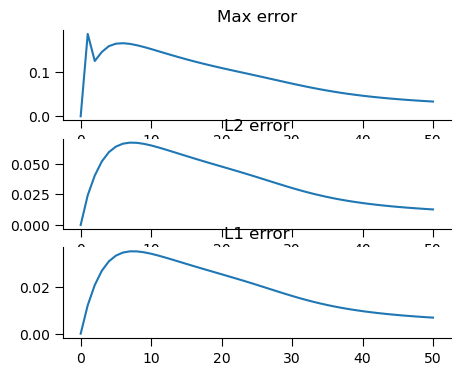

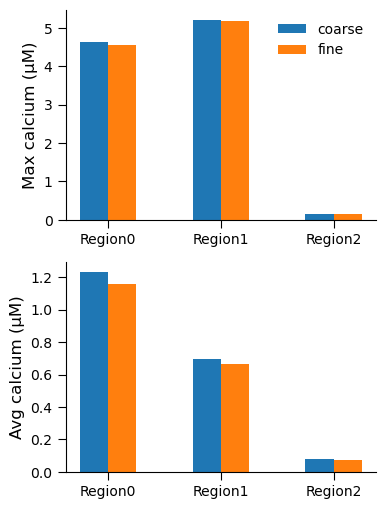

In [2]:
import postprocess, json
results_folder = pathlib.Path.cwd() / ".." / "analysis_data" / "results_dendriticspine_new"
output_folder = results_folder / "output"
output_folder.mkdir(exist_ok=True, parents=True)
results_file = output_folder / "results_dendritic_spine.json"

print(f"Gather results from {results_folder}")
all_results = postprocess.load_all_data(results_folder)
print(f"Save results to {results_file.absolute()}")
results_file.write_text(
    json.dumps([r.to_json() for r in all_results], indent=4)
)
spine_head = [-1000,-1000,0.2,1000,1000,1000]
spine_neck = [0, -1000, -0.4, 1000, 1000, 0.2]
spine_shaft = [-1000,-1000,-1000,1000,1000,-0.4]
domains = [spine_head, spine_neck, spine_shaft]
postprocess.plot_linf_error(all_results, output_folder, format=".pdf", subdomains=domains)